In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from sklearn.cluster import KMeans

# Importing Datsets

In [ ]:
sales = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/100_Sales.csv').drop(columns=['Unnamed: 9','Unnamed: 10'])

In [ ]:
sales.head()

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Ship_Date,Unit_Cost,Total_Revenue,Total_Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,27/06/2010,159.42,2533654.00,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,15/09/2012,117.11,576782.80,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05/08/2014,524.96,1158502.59,224598.75
3,Sub_Saharan Africa,Sao Tome and Principe,Fruits,Online,C,07/05/2014,6.92,75591.66,19525.82
4,Sub_Saharan Africa,Rwanda,Office Supplies,Offline,L,02/06/2013,524.96,3296425.02,639077.50


# Data Analysis

The purpose of this sales analytics is to simplify the information available to the company and help them clearly understand
the sale's performance, sales trends, and opportunities.

In [ ]:
days = sales['Ship_Date'].str.split('/').str.get(0).values
months = sales['Ship_Date'].str.split('/').str.get(1).values
years = sales['Ship_Date'].str.split('/').str.get(2).values

In [ ]:
date_series = years +'/' + months + '/'+ days

In [ ]:
sales['Ship_Date'] = pd.to_datetime(date_series)

In [ ]:
sales.info() #notice the memory usage before conveting the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          100 non-null    object        
 1   Country         100 non-null    object        
 2   Item_Type       100 non-null    object        
 3   Sales_Channel   100 non-null    object        
 4   Order_Priority  100 non-null    object        
 5   Ship_Date       100 non-null    datetime64[ns]
 6   Unit_Cost       100 non-null    float64       
 7   Total_Revenue   100 non-null    float64       
 8   Total_Profit    100 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 7.2+ KB


In [ ]:
# let's check the variables that will be best suitable for category dtype
sales.nunique()

Region              7
Country            76
Item_Type          12
Sales_Channel       2
Order_Priority      4
Ship_Date          99
Unit_Cost          12
Total_Revenue     100
Total_Profit      100
dtype: int64

In [ ]:
sales['Region'] = sales['Region'].astype('category')
sales['Item_Type'] = sales['Item_Type'].astype('category')
sales['Sales_Channel'] = sales['Sales_Channel'].astype('category')
sales['Order_Priority'] = sales['Order_Priority'].astype('category')

In [ ]:
sales.info() #notice the memory usage now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          100 non-null    category      
 1   Country         100 non-null    object        
 2   Item_Type       100 non-null    category      
 3   Sales_Channel   100 non-null    category      
 4   Order_Priority  100 non-null    category      
 5   Ship_Date       100 non-null    datetime64[ns]
 6   Unit_Cost       100 non-null    float64       
 7   Total_Revenue   100 non-null    float64       
 8   Total_Profit    100 non-null    float64       
dtypes: category(4), datetime64[ns](1), float64(3), object(1)
memory usage: 5.5+ KB


In [ ]:
sales.head() #take a look at data frame structure

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Ship_Date,Unit_Cost,Total_Revenue,Total_Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-06-27,159.42,2533654.00,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-09-15,117.11,576782.80,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-08-05,524.96,1158502.59,224598.75
3,Sub_Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-05-07,6.92,75591.66,19525.82
4,Sub_Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-06-02,524.96,3296425.02,639077.50


# Understanding existing variables and creating new variables

**Revenue** is the total amount of income generated by the sale of goods or services related to the company's primary operations.

**Profit** is typically called net profit or the bottom line, is the amount of income that remains after accounting for all expenses, debts, additional income streams, and operating costs.

So if we want to get the expense we can get it by deducting Profit from the Revenue.

In [ ]:
sales['Expense'] = sales['Total_Revenue'] -sales['Total_Profit']

The **profit margin** is a ratio of a company's profit (sales minus all expenses) divided by its revenue. The profit margin ratio compares profit to sales and tells you how well the company is handling its finances overall. It's always expressed as a percentage.

In [ ]:
sales['Profit_Margin'] = (sales['Total_Profit'] / sales['Total_Revenue'] ) * 100

In [ ]:
sales.head()

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Ship_Date,Unit_Cost,Total_Revenue,Total_Profit,Expense,Profit_Margin
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-06-27,159.42,2533654.00,951410.50,1582243.50,37.550924
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-09-15,117.11,576782.80,248406.36,328376.44,43.067574
2,Europe,Russia,Office Supplies,Offline,L,2014-08-05,524.96,1158502.59,224598.75,933903.84,19.386987
3,Sub_Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-05-07,6.92,75591.66,19525.82,56065.84,25.830654
4,Sub_Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-06-02,524.96,3296425.02,639077.50,2657347.52,19.386987


As we know by now that **Profit Margin** tells a lot about company's performance, let's rank them based on their Profit Margin.

In [ ]:
sales['Rank'] = sales['Profit_Margin'].rank(ascending=False).astype('int')

# Which Region earns the highest Profit Margin? *and it's associated country?

In [ ]:
sales.sort_values(by='Profit_Margin', ascending=False).head(1)

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Ship_Date,Unit_Cost,Total_Revenue,Total_Profit,Expense,Profit_Margin,Rank
67,Central America and the Caribbean,Belize,Clothes,Offline,M,2016-07-09,35.84,600821.44,403773.12,197048.32,67.203514,1


# Which Region earns the highest Profit? *and it's associated country?

In [ ]:
regions = sales.groupby(by='Region')

In [ ]:
df_highest_profit_regions = pd.DataFrame(columns=sales.columns)

In [ ]:
for reg, data in regions:
    highest_profit = data.nlargest(1, 'Total_Profit')
    df_highest_profit_regions = pd.concat([df_highest_profit_regions, highest_profit])

In [ ]:
df_highest_profit_regions.sort_values(by='Total_Profit', ascending=False)

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Ship_Date,Unit_Cost,Total_Revenue,Total_Profit,Expense,Profit_Margin,Rank
74,Middle East and North Africa,Pakistan,Cosmetics,Offline,L,2013-08-16,263.33,4324782.40,1719922.04,2604860.36,39.768984,34
79,Australia and Oceania,Samoa,Cosmetics,Online,H,2013-07-08,263.33,4220728.80,1678540.98,2542187.82,39.768984,34
46,Europe,Iceland,Cosmetics,Online,C,2016-12-31,263.33,3876652.40,1541705.29,2334947.11,39.768984,34
13,Central America and the Caribbean,Honduras,Household,Offline,H,2017-02-13,502.54,5997054.98,1487261.02,4509793.96,24.799856,84
33,Asia,Myanmar,Household,Offline,H,2015-01-03,502.54,5513227.50,1367272.50,4145955.00,24.799856,80
59,Sub_Saharan Africa,Djibouti,Cosmetics,Offline,H,2014-04-19,263.33,3154398.00,1254472.05,1899925.95,39.768984,34
75,North America,Mexico,Household,Offline,C,2014-12-12,502.54,4647149.58,1152486.42,3494663.16,24.799856,84


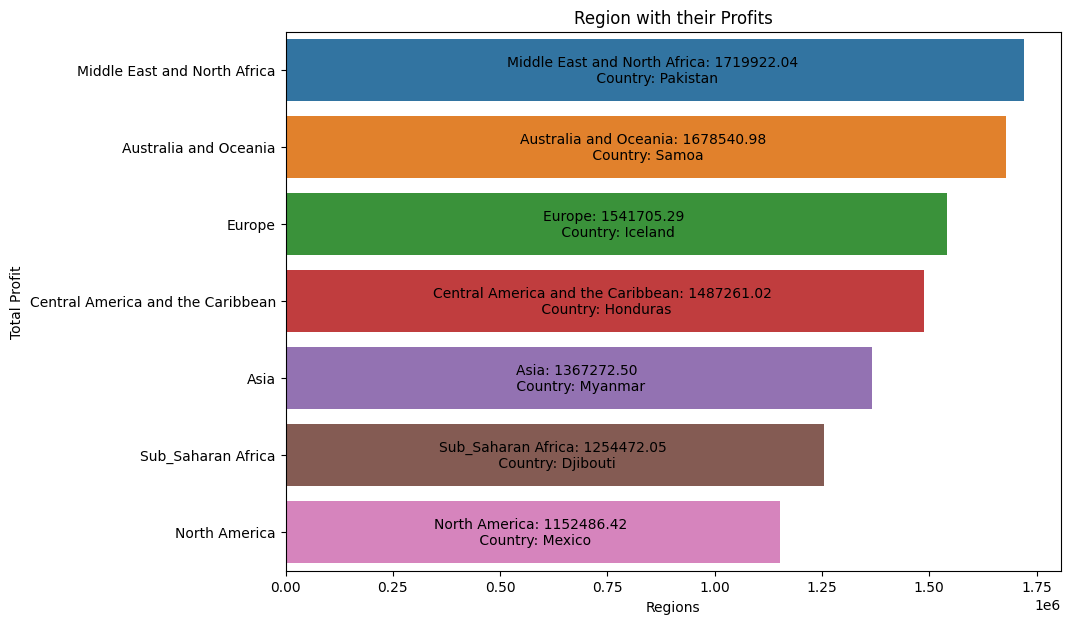

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))

tmp_df = df_highest_profit_regions.copy()

tmp_df = tmp_df.sort_values(by='Total_Profit', ascending=False)

sns.barplot(x = tmp_df['Total_Profit'], y=tmp_df['Region'], orient='h', data=tmp_df,\
           order=['Middle East and North Africa', 'Australia and Oceania', 'Europe', 'Central America and the Caribbean', 'Asia', 'Sub_Saharan Africa', 'North America'],
            capsize=0.2, ax=ax)

lbs = ['Middle East and North Africa: 1719922.04 \n Country: Pakistan',
      'Australia and Oceania: 1678540.98 \n Country: Samoa',
      'Europe: 1541705.29 \n Country: Iceland',
      'Central America and the Caribbean: 1487261.02 \n Country: Honduras',
      'Asia: 1367272.50 \n Country: Myanmar',
      'Sub_Saharan Africa: 1254472.05 \n Country: Djibouti',
      'North America: 1152486.42 \n Country: Mexico']

ax.bar_label(ax.containers[-1], labels=lbs,label_type='center')

plt.title('Region with their Profits')
plt.xlabel('Regions')
plt.ylabel('Total Profit')
plt.show()

# Which Region earns the highest Profit Margin?

In [ ]:
df_highest_pmargin_region = pd.DataFrame(columns=sales.columns)

In [ ]:
for reg, data in regions:
    highest_margin = data.nlargest(1, 'Profit_Margin')
    df_highest_pmargin_region = pd.concat([df_highest_pmargin_region, highest_margin])

In [ ]:
df_highest_pmargin_region.sort_values(by='Profit_Margin', ascending=False)

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Ship_Date,Unit_Cost,Total_Revenue,Total_Profit,Expense,Profit_Margin,Rank
67,Central America and the Caribbean,Belize,Clothes,Offline,M,2016-07-09,35.84,600821.44,403773.12,197048.32,67.203514,1
12,Asia,Bangladesh,Clothes,Online,L,2017-01-03,35.84,902980.64,606834.72,296145.92,67.203514,6
56,Australia and Oceania,Fiji,Clothes,Offline,C,2010-01-08,35.84,1082418.40,727423.20,354995.20,67.203514,6
15,Europe,Bulgaria,Clothes,Online,M,2012-03-06,35.84,182825.44,122865.12,59960.32,67.203514,6
63,Middle East and North Africa,Libya,Clothes,Offline,H,2010-11-17,35.84,668356.48,449159.04,219197.44,67.203514,6
11,Sub_Saharan Africa,Cape Verde,Clothes,Offline,H,2014-08-19,35.84,455479.04,306097.92,149381.12,67.203514,6
98,North America,Mexico,Personal Care,Offline,M,2015-08-08,56.67,471336.91,144521.02,326815.89,30.661936,61


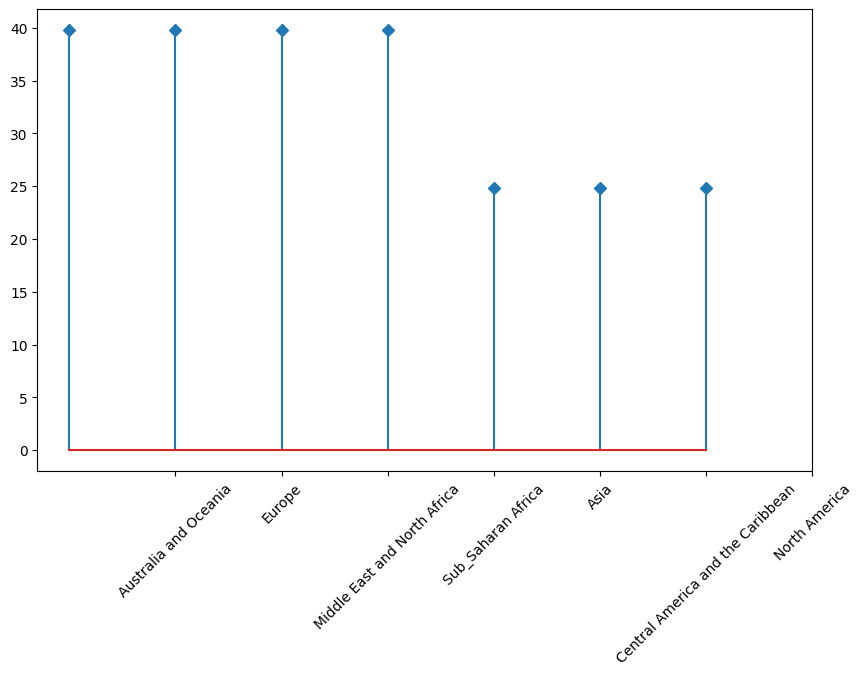

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

tmp_df = df_highest_profit_regions.copy()
tmp_df = tmp_df.sort_values(by='Profit_Margin', ascending=False)
plt.stem(tmp_df['Profit_Margin'],markerfmt='D')
my_range=range(1,len(tmp_df.index)+1)
plt.xticks( my_range, tmp_df['Region'], rotation=45)

plt.show()

In [ ]:
!pip install squarify

# Which Region has the highest countries operating?

# Which Region has the highest total Revenue?

# Which Region has the highest total Profit?

# Which Region has the highest Expenses?

In [ ]:
regions.agg({'Country':'count',
             'Unit_Cost': 'sum',
             'Total_Revenue': 'sum',
            'Total_Profit': 'sum',
            'Expense': 'sum'})

,Country,Unit_Cost,Total_Revenue,Total_Profit,Expense
Region,,,,,
Asia,11,2635.46,21347091.02,6113845.87,15233245.15
Australia and Oceania,11,1702.19,14094265.13,4722160.03,9372105.10
Central America and the Caribbean,7,1104.72,9170385.49,2846907.85,6323477.64
Europe,22,4909.66,33368932.11,11082938.63,22285993.48
Middle East and North Africa,10,1524.50,14052706.58,5761191.86,8291514.72
North America,3,615.88,5643356.55,1457942.76,4185413.79
Sub_Saharan Africa,36,6612.39,39672031.43,12183211.40,27488820.03


In [ ]:
tmp_df=regions.agg({'Country':'count',
             'Unit_Cost': 'sum',
             'Total_Revenue': 'sum',
            'Total_Profit': 'sum',
            'Expense': 'sum'})

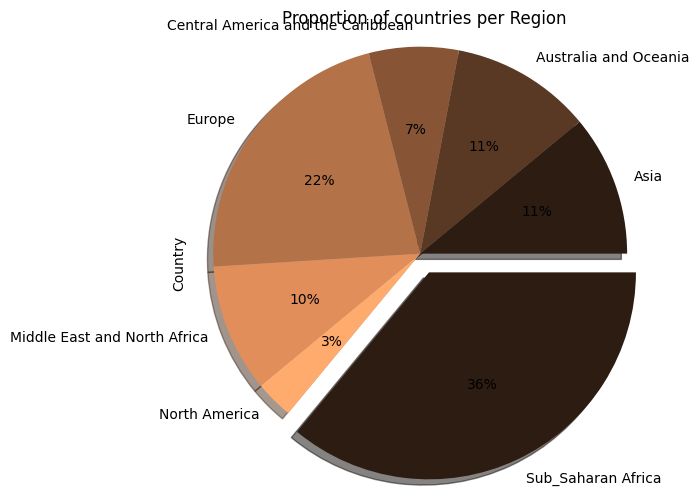

In [ ]:
plt.figure(figsize=(6,6))
tmp_df['Country'].plot.pie(autopct = "%1.0f%%", colors = sns.color_palette('copper'), shadow = True,
                          explode=(0, 0, 0, 0, 0, 0, 0.1))

plt.title('Proportion of countries per Region')
plt.axis('equal')
plt.show()

In [ ]:
import squarify

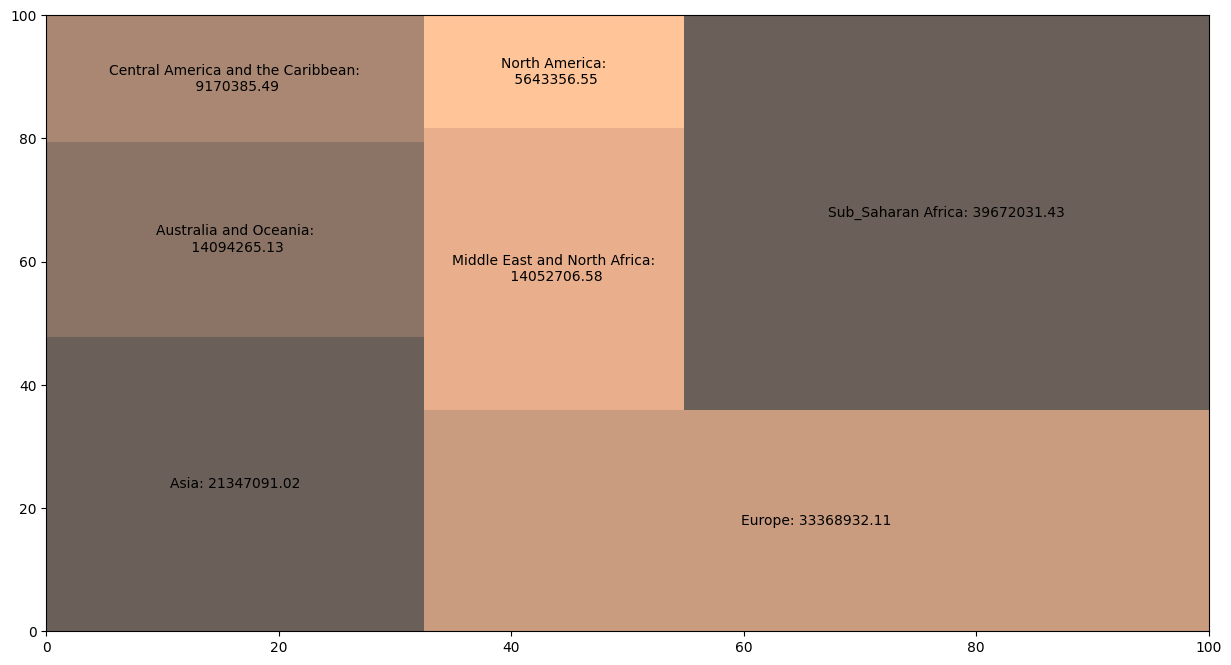

In [ ]:
plt.figure(figsize=(15,8))
revs = tmp_df['Total_Revenue'].values
labels = ['Asia: 21347091.02',
 'Australia and Oceania:\n 14094265.13',
 'Central America and the Caribbean:\n 9170385.49',
 'Europe: 33368932.11',
 'Middle East and North Africa:\n 14052706.58',
 'North America:\n 5643356.55',
 'Sub_Saharan Africa: 39672031.43']
squarify.plot(revs,label=labels, color= sns.color_palette('copper'), alpha=0.7)
plt.show()

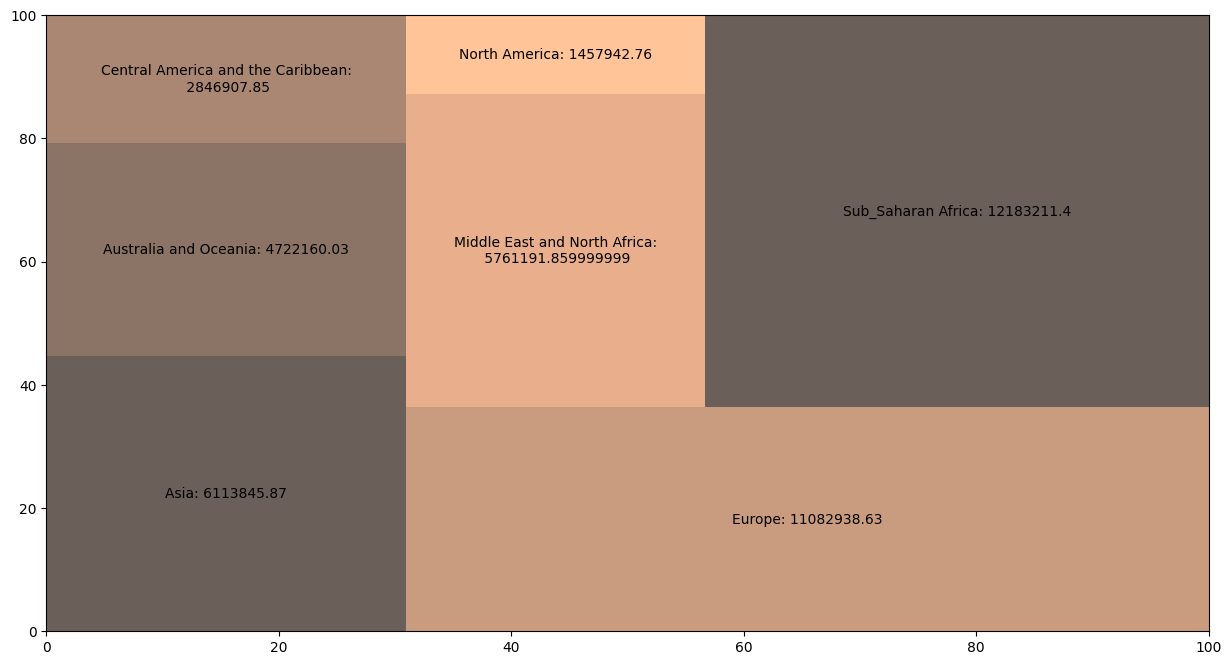

In [ ]:
plt.figure(figsize=(15,8))
revs = tmp_df['Total_Profit'].values
labels = ['Asia: 6113845.87',
 'Australia and Oceania: 4722160.03',
 'Central America and the Caribbean:\n 2846907.85',
 'Europe: 11082938.63',
 'Middle East and North Africa:\n 5761191.859999999',
 'North America: 1457942.76',
 'Sub_Saharan Africa: 12183211.4']
squarify.plot(revs,label=labels, color= sns.color_palette('copper'), alpha=0.7)
plt.show()

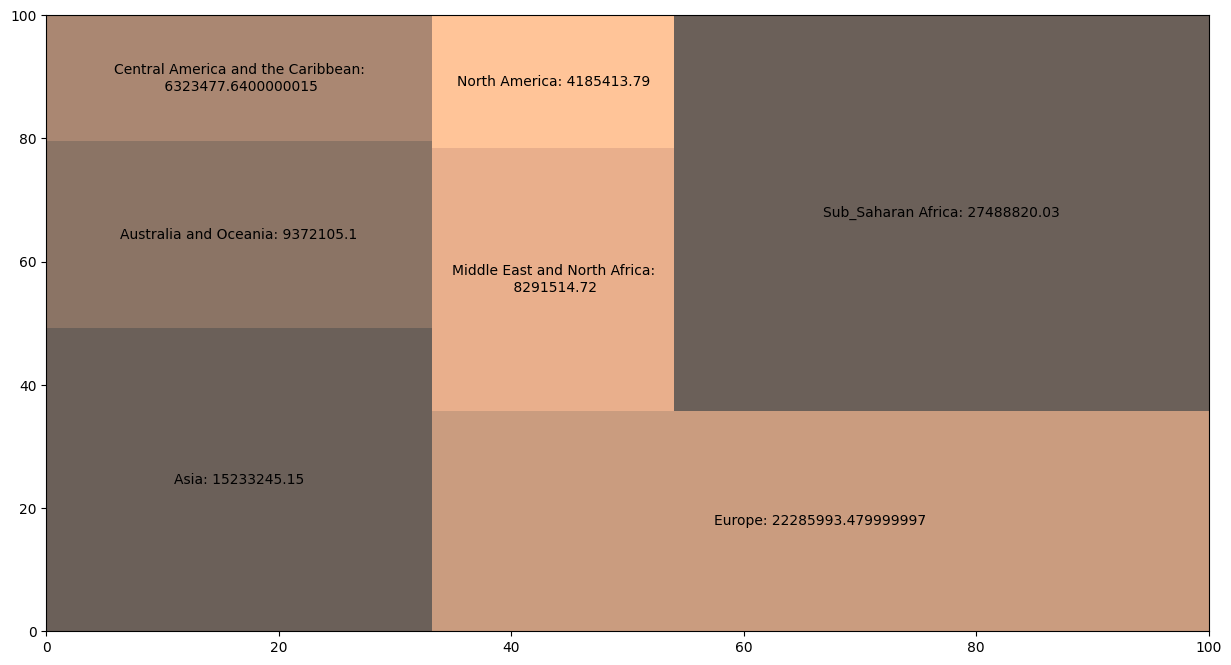

In [ ]:
plt.figure(figsize=(15,8))
revs = tmp_df['Expense'].values
labels = ['Asia: 15233245.15',
 'Australia and Oceania: 9372105.1',
 'Central America and the Caribbean:\n 6323477.6400000015',
 'Europe: 22285993.479999997',
 'Middle East and North Africa:\n 8291514.72',
 'North America: 4185413.79',
 'Sub_Saharan Africa: 27488820.03']
squarify.plot(revs,label=labels, color= sns.color_palette('copper'), alpha=0.7)
plt.show()

# Region wise profit Margin over the years

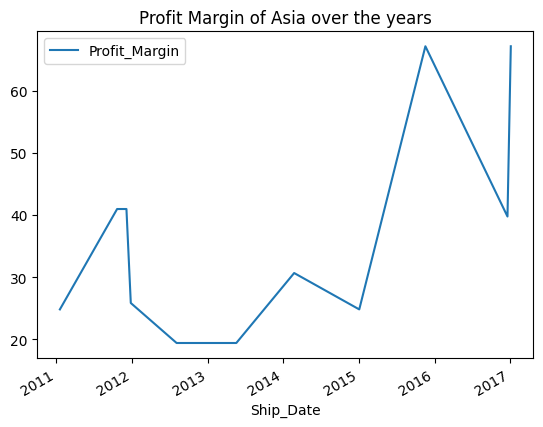

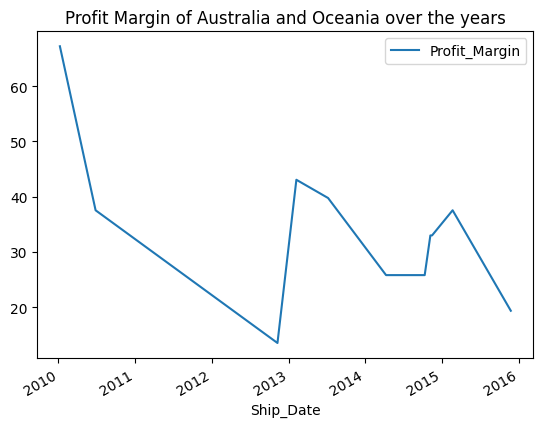

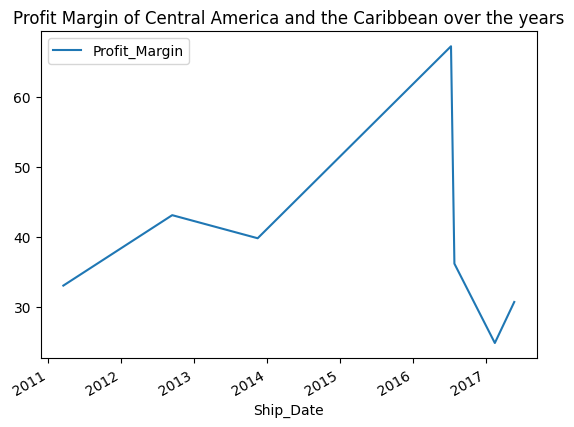

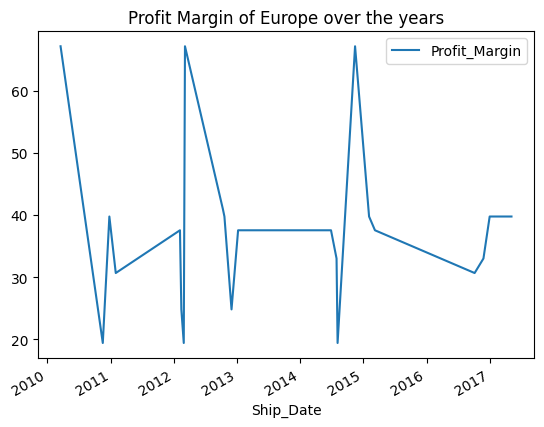

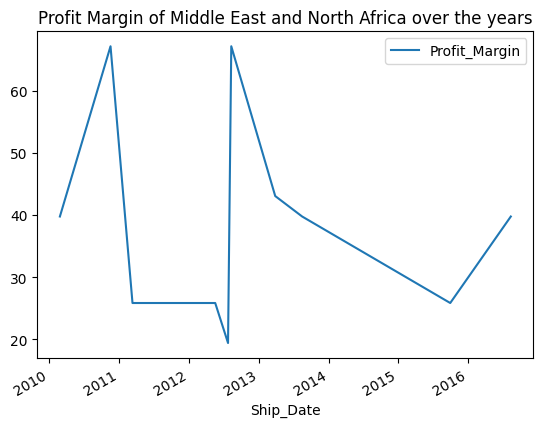

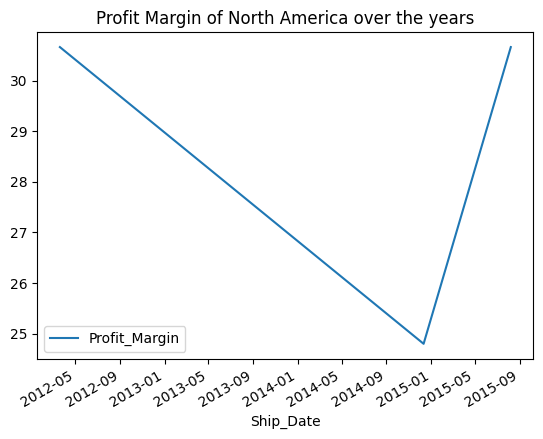

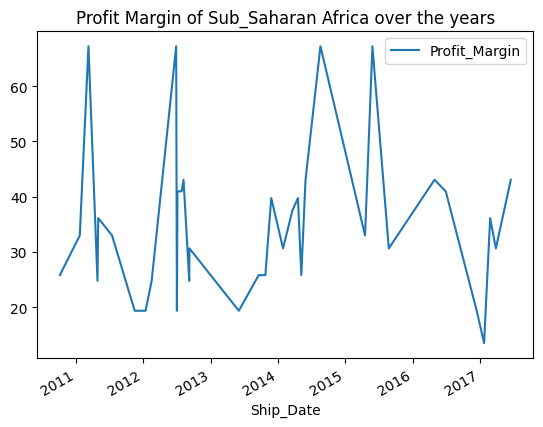

In [ ]:
for k, d in regions:
    t_df = regions.get_group(k)
    t_df.set_index('Ship_Date').plot(y=['Profit_Margin'])
    plt.title('Profit Margin of {} over the years'.format(k))
    plt.show()

# which Item type has the highest dealears?

In [ ]:
items_group = sales.groupby(by='Item_Type')

In [ ]:
items_group.agg({'Country': 'count',
                'Unit_Cost': 'sum',
                'Total_Revenue': 'sum',
                'Total_Profit': 'sum',
                'Expense': 'sum'})

,Country,Unit_Cost,Total_Revenue,Total_Profit,Expense
Item_Type,,,,,
Baby Food,7,1115.94,10350327.60,3886643.70,6463683.90
Beverages,8,254.32,2690794.60,888047.28,1802747.32
Cereal,7,819.77,5322898.90,2292443.43,3030455.47
Clothes,13,465.92,7787292.80,5233334.40,2553958.40
Cosmetics,13,3423.29,36601509.60,14556048.66,22045460.94
Fruits,10,69.20,466481.34,120495.18,345986.16
Household,9,4522.86,29889712.29,7412605.71,22477106.58
Meat,2,729.38,4503675.75,610610.00,3893065.75
Office Supplies,12,6299.52,30585380.07,5929583.75,24655796.32


In [ ]:
tmp_df = items_group.agg({'Country': 'count',
                'Unit_Cost': 'sum',
                'Total_Revenue': 'sum',
                'Total_Profit': 'sum',
                'Expense': 'sum'})

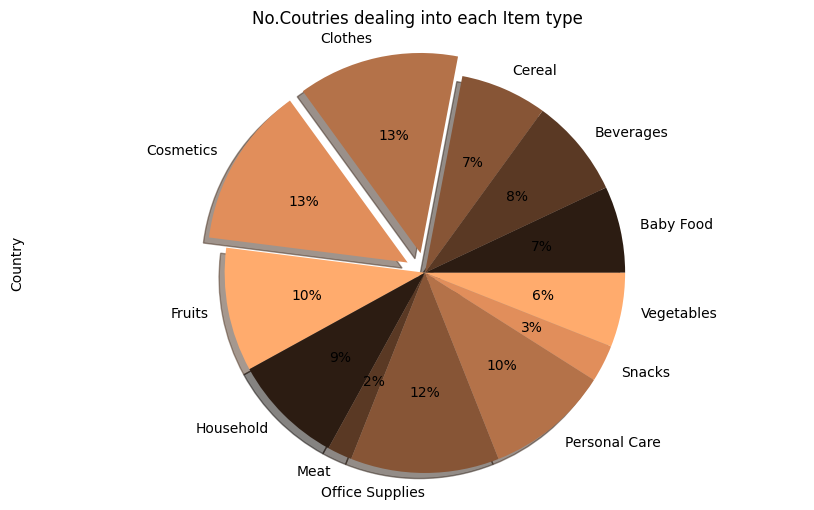

In [ ]:
plt.figure(figsize=(10,6))

tmp_df['Country'].plot.pie(autopct = "%1.0f%%", colors = sns.color_palette('copper'), shadow = True,
                          explode=(0, 0, 0, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0))

plt.title('No.Coutries dealing into each Item type')
plt.axis('equal')
plt.show()

# Which Item Type has the highest Total Revenue?

In [ ]:
def highlight_cols(x):
    df = x.copy()
    df.loc[:, 'Total_Revenue'] = 'background-color: green'
    df[['Country', 'Unit_Cost', 'Total_Profit','Expense']] = 'background-color: grey'
    return df

In [ ]:
display(tmp_df.style.apply(highlight_cols, axis = None))

,Country,Unit_Cost,Total_Revenue,Total_Profit,Expense
Item_Type,,,,,
Baby Food,7,1115.940000,10350327.600000,3886643.700000,6463683.900000
Beverages,8,254.320000,2690794.600000,888047.280000,1802747.320000
Cereal,7,819.770000,5322898.900000,2292443.430000,3030455.470000
Clothes,13,465.920000,7787292.800000,5233334.400000,2553958.400000
Cosmetics,13,3423.290000,36601509.600000,14556048.660000,22045460.940000
Fruits,10,69.200000,466481.340000,120495.180000,345986.160000
Household,9,4522.860000,29889712.290000,7412605.710000,22477106.580000
Meat,2,729.380000,4503675.750000,610610.000000,3893065.750000
Office Supplies,12,6299.520000,30585380.070000,5929583.750000,24655796.320000


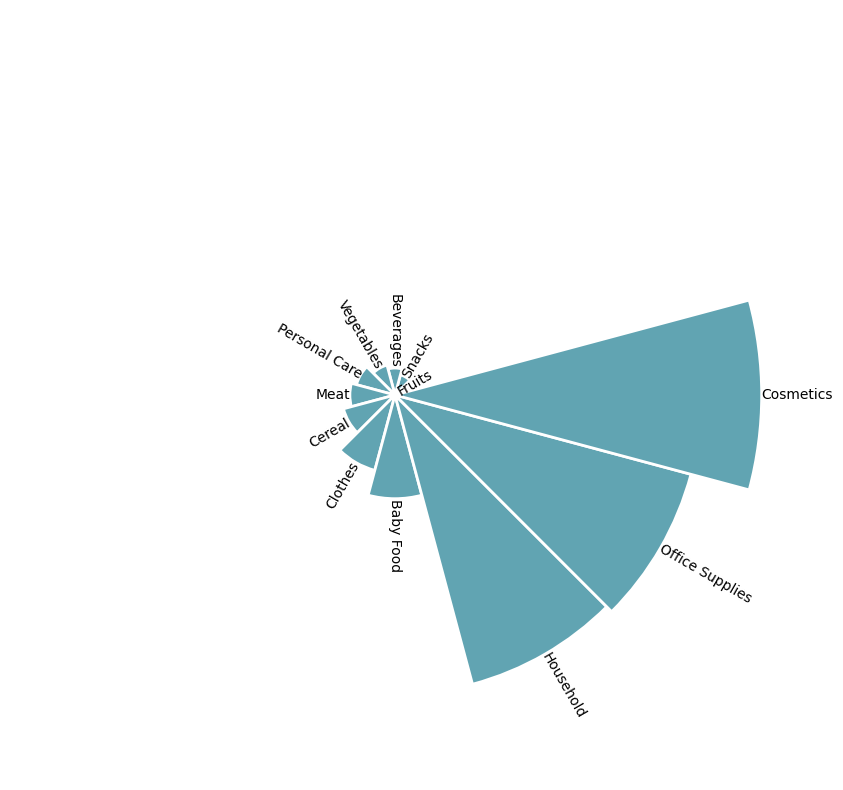

In [ ]:
# Reorder the dataframe
df = tmp_df['Total_Revenue'].to_frame()
df = df.sort_values(by=['Total_Revenue'])

# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 100
lowerLimit = 30
labelPadding = 4

# Compute max and min in the dataset
max = df['Total_Revenue'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df['Total_Revenue'] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles,
    height=heights,
    width=width,
    bottom=lowerLimit,
    linewidth=2,
    edgecolor="white",
    color="#61a4b2",
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df.index):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else:
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle,
        y=lowerLimit + bar.get_height() + labelPadding,
        s=label,
        ha=alignment,
        va='center',
        rotation=rotation,
        rotation_mode="anchor")


# Which Item type has the highest Total Profit?

In [ ]:
def highlight_cols(x):
    df = x.copy()
    df.loc[:, 'Total_Profit'] = 'background-color: green'
    df[['Country', 'Unit_Cost', 'Total_Revenue','Expense']] = 'background-color: grey'
    return df

In [ ]:
display(tmp_df.style.apply(highlight_cols, axis = None))

,Country,Unit_Cost,Total_Revenue,Total_Profit,Expense
Item_Type,,,,,
Baby Food,7,1115.940000,10350327.600000,3886643.700000,6463683.900000
Beverages,8,254.320000,2690794.600000,888047.280000,1802747.320000
Cereal,7,819.770000,5322898.900000,2292443.430000,3030455.470000
Clothes,13,465.920000,7787292.800000,5233334.400000,2553958.400000
Cosmetics,13,3423.290000,36601509.600000,14556048.660000,22045460.940000
Fruits,10,69.200000,466481.340000,120495.180000,345986.160000
Household,9,4522.860000,29889712.290000,7412605.710000,22477106.580000
Meat,2,729.380000,4503675.750000,610610.000000,3893065.750000
Office Supplies,12,6299.520000,30585380.070000,5929583.750000,24655796.320000


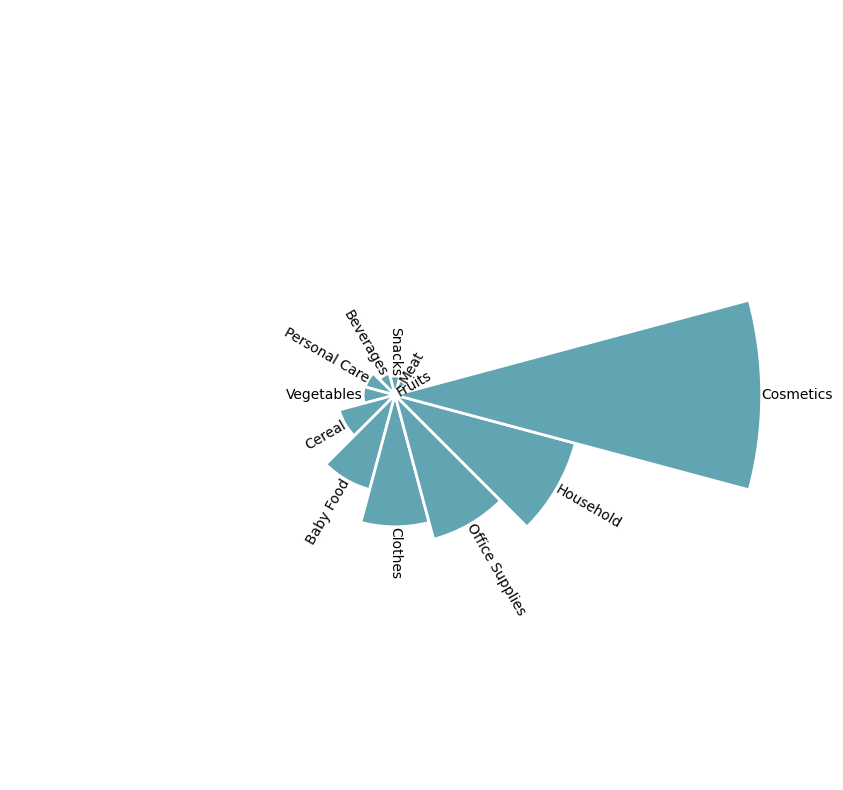

In [ ]:
# Reorder the dataframe
df = tmp_df['Total_Profit'].to_frame()
df = df.sort_values(by=['Total_Profit'])

# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 100
lowerLimit = 30
labelPadding = 4

# Compute max and min in the dataset
max = df['Total_Profit'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df['Total_Profit'] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles,
    height=heights,
    width=width,
    bottom=lowerLimit,
    linewidth=2,
    edgecolor="white",
    color="#61a4b2",
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df.index):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else:
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle,
        y=lowerLimit + bar.get_height() + labelPadding,
        s=label,
        ha=alignment,
        va='center',
        rotation=rotation,
        rotation_mode="anchor")


# Which Item Type has the highest Expense?

In [ ]:
def highlight_cols(x):
    df = x.copy()
    df.loc[:, 'Expense'] = 'background-color: green'
    df[['Country', 'Unit_Cost', 'Total_Revenue','Total_Profit']] = 'background-color: grey'
    return df

In [ ]:
display(tmp_df.style.apply(highlight_cols, axis = None))

,Country,Unit_Cost,Total_Revenue,Total_Profit,Expense
Item_Type,,,,,
Baby Food,7,1115.940000,10350327.600000,3886643.700000,6463683.900000
Beverages,8,254.320000,2690794.600000,888047.280000,1802747.320000
Cereal,7,819.770000,5322898.900000,2292443.430000,3030455.470000
Clothes,13,465.920000,7787292.800000,5233334.400000,2553958.400000
Cosmetics,13,3423.290000,36601509.600000,14556048.660000,22045460.940000
Fruits,10,69.200000,466481.340000,120495.180000,345986.160000
Household,9,4522.860000,29889712.290000,7412605.710000,22477106.580000
Meat,2,729.380000,4503675.750000,610610.000000,3893065.750000
Office Supplies,12,6299.520000,30585380.070000,5929583.750000,24655796.320000


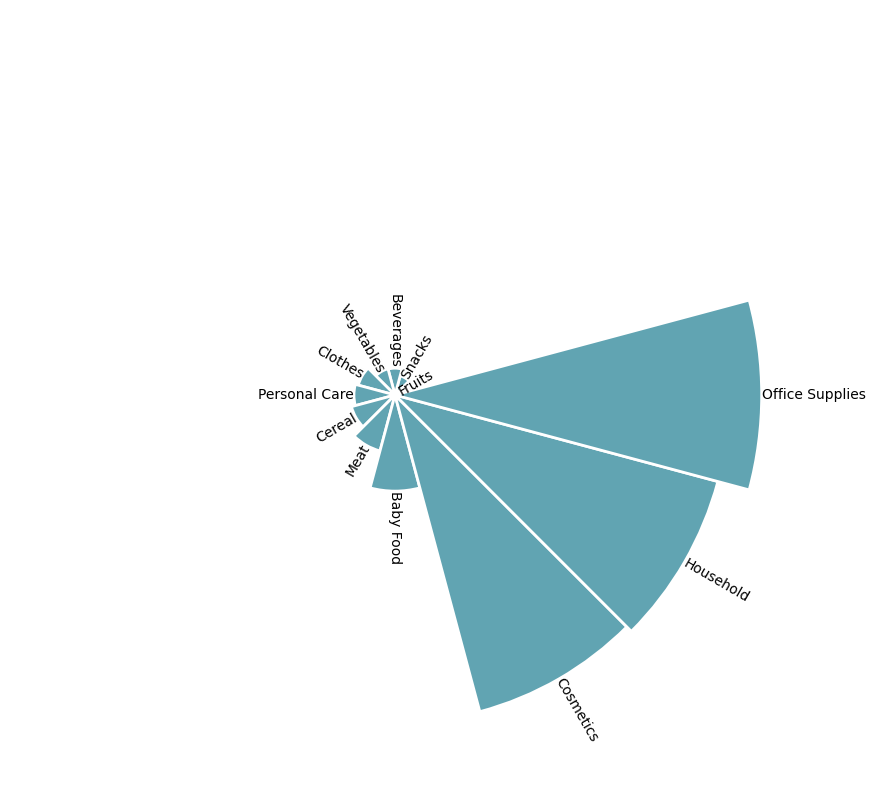

In [ ]:
# Reorder the dataframe
df = tmp_df['Expense'].to_frame()
df = df.sort_values(by=['Expense'])

# initialize the figure
plt.figure(figsize=(20,10))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 100
lowerLimit = 30
labelPadding = 4

# Compute max and min in the dataset
max = df['Expense'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df['Expense'] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles,
    height=heights,
    width=width,
    bottom=lowerLimit,
    linewidth=2,
    edgecolor="white",
    color="#61a4b2",
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df.index):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else:
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle,
        y=lowerLimit + bar.get_height() + labelPadding,
        s=label,
        ha=alignment,
        va='center',
        rotation=rotation,
        rotation_mode="anchor")


# Which channel has highest no of dealers/ total revenue/ total profit/ expense?

In [ ]:
channel_group = sales.groupby(by='Sales_Channel')

In [ ]:
channel_group.agg({'Country': 'count',
                  'Total_Revenue': 'sum',
                  'Total_Profit': 'sum',
                  'Expense': 'sum'}).T

Sales_Channel,Offline,Online
Country,50.00,50.00
Total_Revenue,79094809.20,58253959.11
Total_Profit,24920726.67,19247471.73
Expense,54174082.53,39006487.38


###### Which is the most Prevailed Order Priority category High/Low/ Medium or Uregnt?

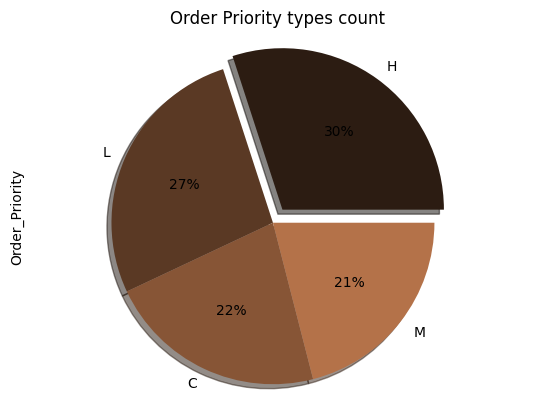

In [ ]:
sales['Order_Priority'].value_counts().plot.pie(autopct = "%1.0f%%", colors = sns.color_palette('copper'), shadow = True,
                          explode = (0.1,0,0,0))

plt.title('Order Priority types count')
plt.axis('equal')
plt.show()

In [ ]:
op_group = sales.groupby('Order_Priority')

###### Profit Margin per Order priority over the years?

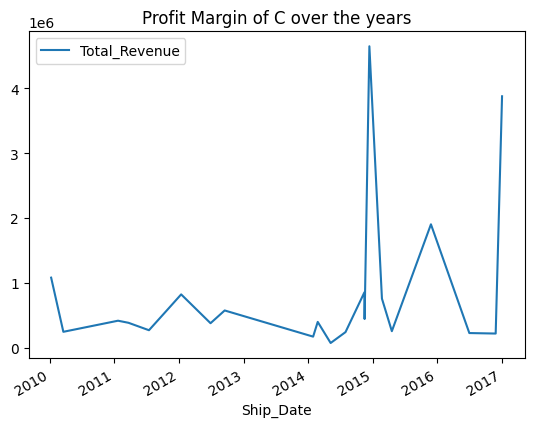

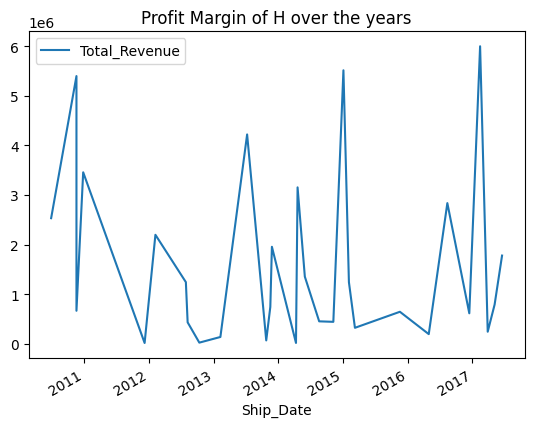

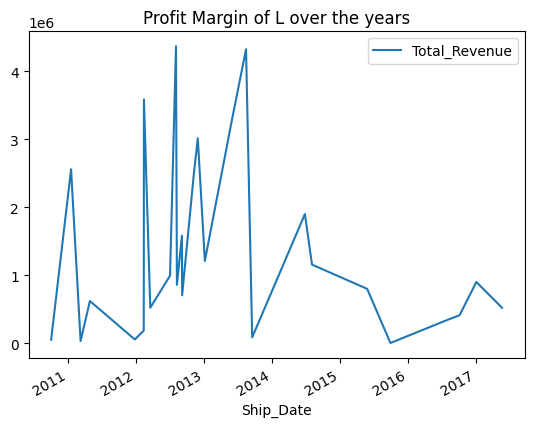

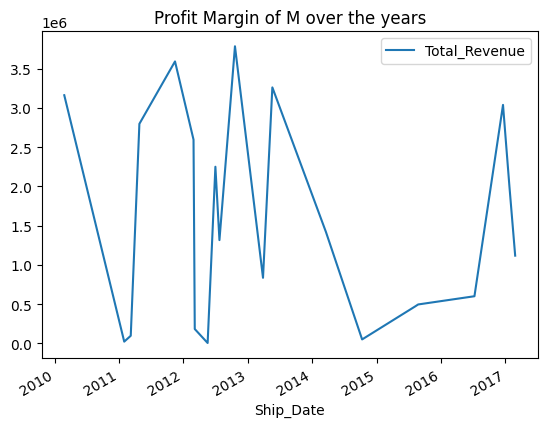

In [ ]:
for k, data in op_group:
    t_df = op_group.get_group(k)
    t_df.set_index('Ship_Date').plot(y=['Total_Revenue'])
    plt.title('Profit Margin of {} over the years'.format(k))
    plt.show()